# ***Tomato Leaf Diseas Prediction Using MobileNetV2***

In [28]:
import tensorflow

In [ ]:
tensorflow.__version__

'2.12.0'

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
# Data For train and test
train_path = '/content/drive/MyDrive/Tomato/train'
valid_path = '/content/drive/MyDrive/Tomato/valid'

In [4]:
# Model loading
mobile_net =  MobileNetV2(input_shape=(224,224,3) , weights='imagenet', include_top=False)

9406464/9406464 [==============================] - 0s 0us/step


In [5]:
# don't train existing weights
for layer in mobile_net.layers:
    layer.trainable = False

In [6]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Tomato/train/*')

In [7]:
len(folders)

11

In [8]:
# our layers - you can add more if you want
x = Flatten()(mobile_net.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobile_net.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Tomato/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 25898 images belonging to 11 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Tomato/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6684 images belonging to 11 classes.


In [15]:
prediction_clases = training_set.class_indices

In [16]:
prediction_clases

{'Bacterial_spot': 0,
 'Early_blight': 1,
 'Late_blight': 2,
 'Leaf_Mold': 3,
 'Septoria_leaf_spot': 4,
 'Spider_mites Two-spotted_spider_mite': 5,
 'Target_Spot': 6,
 'Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato_mosaic_virus': 8,
 'healthy': 9,
 'powdery_mildew': 10}

In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
810/810 [==============================] - 9658s 12s/step - loss: 3.9498 - accuracy: 0.7057 - val_loss: 3.8419 - val_accuracy: 0.7560
Epoch 2/10
810/810 [==============================] - 436s 538ms/step - loss: 3.0091 - accuracy: 0.8135 - val_loss: 4.3205 - val_accuracy: 0.7876
Epoch 3/10
810/810 [==============================] - 449s 554ms/step - loss: 2.6705 - accuracy: 0.8493 - val_loss: 3.3277 - val_accuracy: 0.8339
Epoch 4/10
810/810 [==============================] - 433s 534ms/step - loss: 2.4663 - accuracy: 0.8670 - val_loss: 3.6659 - val_accuracy: 0.8410
Epoch 5/10
810/810 [==============================] - 430s 530ms/step - loss: 2.3196 - accuracy: 0.8817 - val_loss: 4.1314 - val_accuracy: 0.8414
Epoch 6/10
810/810 [==============================] - 434s 536ms/step - loss: 2.2012 - accuracy: 0.8896 - val_loss: 3.7110 - val_accuracy: 0.8526
Epoch 7/10
810/810 [==============================] - 429s 530ms/step - loss: 2.1931 - accuracy: 0.8978 - val_loss: 3.9350 - 

In [29]:
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss')

In [30]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  callbacks=[callback],
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
810/810 [==============================] - 423s 519ms/step - loss: 1.8196 - accuracy: 0.9231 - val_loss: 4.0636 - val_accuracy: 0.8845
Epoch 2/10
810/810 [==============================] - 418s 516ms/step - loss: 1.8536 - accuracy: 0.9220 - val_loss: 5.2390 - val_accuracy: 0.8622


In [18]:
import matplotlib.pyplot as plt

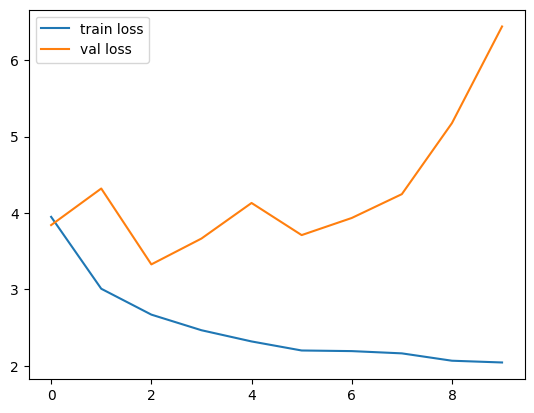

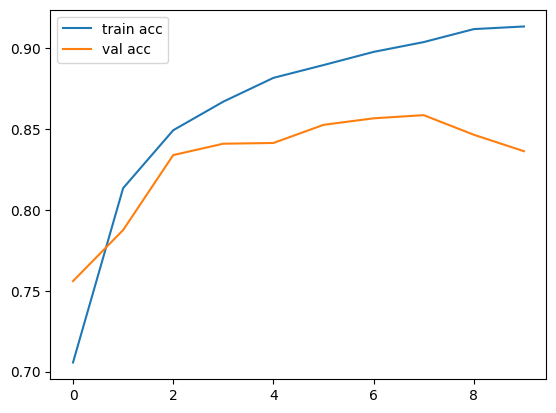

<Figure size 640x480 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_mobilenet1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# ***Image*** ***Prediction***

In [21]:
image_path = '/content/drive/MyDrive/Tomato/valid/healthy/02d94768-da6d-4c1a-b8b3-fa2e5a2fcd4d___RS_HL 0449.JPG'

In [24]:
model=load_model('/content/model_mobilenet1.h5')

In [25]:
from tensorflow.keras.utils import img_to_array
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img


def model_predict(img_path, model):
    img = load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = img_to_array(img)
    # x = np.true_divide(x, 255)
    ## Scaling
    x=x/255
    x = np.expand_dims(x, axis=0)

    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)[0]
    if preds==0:
      preds="Bacterial_spot"
    elif preds==1:
      preds="Early_blight"
    elif preds==2:
      preds="Late_blight"
    elif preds==3:
      preds="Leaf_Mold"
    elif preds==4:
      preds="Septoria_leaf_spot"
    elif preds==5:
      preds="Spider_mites Two-spotted_spider_mite"
    elif preds==6:
      preds="Target_Spot"
    elif preds==7:
      preds="Tomato_Yellow_Leaf_Curl_Virus"
    elif preds==8:
      preds="Tomato_mosaic_virus"
    elif preds==9:
      preds="healthy"
    elif preds==10:
      preds="powdery_mildew"
    return preds

In [26]:
model_predict(image_path, model)

1/1 [==============================] - 1s 1s/step


'healthy'